# TRADING SIGNAL MODEL USING GDELT
## EC 48T Project
### Oğuzhan Pınar, Mehmet Sami Boz, Ömer Aydemir


# Import Packages

In [1]:
# Install required gdelt package to download gdelt data
!pip install gdelt
!pip install investpy

# Installing packages
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
scaler = StandardScaler()
import gdelt 
import pandas as pd
import numpy as np
import datetime as dt
import random
import warnings
import investpy
import re
import math as m
import glob
import seaborn as sns
warnings.filterwarnings('ignore')

     |████████████████████████████████| 778kB 6.3MB/s 
     |████████████████████████████████| 4.4MB 5.9MB/s 
     |████████████████████████████████| 245kB 35.6MB/s 
     |████████████████████████████████| 5.5MB 42.7MB/s 
     |████████████████████████████████| 512kB 49.2MB/s 
  Created wheel for investpy: filename=investpy-1.0.2-cp36-none-any.whl size=4466765 sha256=d0aa0c862490ca868507ade15481167b558385c831ca1ac5b6e4eade95f23fdc
  Stored in directory: /root/.cache/pip/wheels/a3/36/72/713ce416550c4edcd337b819c6dc3aeabe60bfcf6b463065c8
Successfully built investpy
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import GDELT Data 
Don't run the this section of the code it downloads the data from API and it takes too long to complete the process due to the size of the data. Downloaded and cleaned version can be read under modelling section.

In [6]:
# In order to download to drive we mount our google drives to colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Version 2 queries
gd2 = gdelt.gdelt(version=2)

In [2]:
# Obtainining all-dates from 2015-04-18 to today
str_dates = []

# Ömer alttaki satırı my_date = dt.date(2017,1,1) olarak değiştirmen gerekiyor
# Sami senin de my_date = dt.date(2019,11,7) olarak değiştirmen gerekiyor
my_date = dt.date(2020,11,1)
while my_date!=dt.date.today():
  str_dates.append(my_date.strftime("%Y %m %d"))
  my_date = my_date + dt.timedelta(days=1)
  
str_dates[:5], len(str_dates)

(['2020 11 01', '2020 11 02', '2020 11 03', '2020 11 04', '2020 11 05'], 103)

In [ ]:
#results = gd2.Search('2016 04 16',table='gkg',coverage=True)
#results

In [ ]:
# Define the themes

target_themes = ["ECON", "HEALTH", "STOCK", "ARMEDCONFLICT", "WMD", "WB_507_ENERGY_AND_EXTRACTIVES", "TAX_FNCACT_POPE", "KILL", "WB_635_PUBLIC_HEALTH", "TAX_ECON_PRICE", "TAX_FNCACT", "TERROR", "ACT_MAKESTATEMENT"
                 'EPU_ECONOMY_HISTORIC', "MEDICAL", "GENERAL_GOVERNMENT", "TAX_FNCACT_OFFICIAL", "BAN","LEGISLATION","SOC_GENERALCRIME","LEADER", "AFFECT", "MILITARY","MANMADE_DISASTER_IMPLIED","ARREST",
 'TAX_ECON_PRICE',
 'EPU_ECONOMY',
 'ECON_STOCKMARKET',
 'ECON_TAXATION',
 'ECON_WORLDCURRENCIES',
 'WB_1104_MACROECONOMIC_VULNERABILITY_AND_DEBT',
 'WB_2748_EMPLOYMENT',
 'WB_2690_CATEGORIES_OF_EMPLOYMENT',
 'ECON_DEBT',
 'WB_471_ECONOMIC_GROWTH',
 'ECON_HOUSING_PRICES',
 'UNEMPLOYMENT',
 'ECON_WORLDCURRENCIES_DOLLAR',
 'ECON_WORLDCURRENCIES_DOLLARS',
 'WB_439_MACROECONOMIC_AND_STRUCTURAL_POLICIES',
 'ECON_CENTRALBANK',
 'TAX_ETHNICITY_TURKISH',
 'TAX_WORLDLANGUAGES_TURKISH',
 'WB_1235_CENTRAL_BANKS',
 'ECON_INTEREST_RATES',
 'ECON_UNIONS',
 'WB_2747_UNEMPLOYMENT',
 'ECON_INFLATION',
 'ECON_CURRENCY_EXCHANGE_RATE',
 'WB_442_INFLATION',
 'ECON_OILPRICE',
 'ECON_WORLDCURRENCIES_EURO',
 'ECON_DEVELOPMENTORGS',
 'TAX_FNCACT_INVESTOR',
 'TAX_FNCACT_ECONOMIST',
 'SLFID_ECONOMIC_DEVELOPMENT',
 'WB_625_HEALTH_ECONOMICS_AND_FINANCE',
 'ECON_SUBSIDIES',
 'WB_1650_PUBLIC_EMPLOYMENT_SERVICES',
 'ECON_BUDGET_DEFICIT',
 'TAX_FNCACT_ECONOMISTS',
 'WB_162_TRANSPORT_ECONOMICS',
 'WB_1070_ECONOMIC_GROWTH_POLICY',
 'SLFID_ECONOMIC_DEVELOPMENTAID',
 'ECON_BOYCOTT',
 'TAX_ECON_FREETRADEAGREEMENTS',
 'ECON_FREETRADE',
 'ECON_MONEYLAUNDERING',
 'ECON_WORLDCURRENCIES_EUROS',
 'WB_1152_ECONOMIC_AND_SOCIAL_MOBILITY',
 'ECON_BANKRUPTCY',
 'ECON_ELECTRICALGENERATION',
 'WB_341_INVESTMENT_FUNDS',
 'ECON_MONOPOLY',
 'WB_444_MONETARY_POLICY',
 'WB_862_GROWTH_POLES_AND_ECONOMIC_ZONES',
 'ECON_TRADE_DISPUTE',
 'ECON_MIDDLECLASS',
 'EPU_POLICY_FEDERAL_RESERVE',
 'ECON_DEVELOPMENTORGS_INTERNATIONAL_MONETARY_FUND',
 'ECON_IPO',
 'ECON_EMERGINGECON',
 'ECON_DEVELOPMENTORGS_WORLD_BANK',
 'ECON_FOREIGNINVEST',
 'ECON_WORLDCURRENCIES_US_DOLLAR',
 'ECON_WORLDCURRENCIES_US_DOLLARS',
 'ECON_BITCOIN',
 'ECON_COST_OF_LIVING',
 'UNGP_JOB_OPPORTUNITIES_EMPLOYMENT',
 'ECON_SOVEREIGN_DEBT',
 'WB_2581_PREFERENTIAL_TRADE_AND_INVESTMENT_AGREEMENTS',
 'ACT_YIELD',
 'ECON_GOLDPRICE',
 'WB_1096_MACROECONOMIC_SUSTAINABILITY',
 'ECON_EARNINGSREPORT',
 'ECON_DEFLATION',
 'ECON_CURRENCY_RESERVES',
 'WB_848_LABOR_AND_EMPLOYMENT_LAWS_AND_REGULATIONS',
 'WB_769_INVESTMENT_POLICY',
 'SLFID_ECONOMIC_POWER',
 'ECON_DEVELOPMENTORGS_WORLD_TRADE_ORGANIZATION',
 'EPU_POLICY_PUBLIC_INVESTMENT',
 'WB_2794_EMPLOYMENT_RELATIONSHIP',
 'WB_2111_COMPETITION_ECONOMICS',
 'ECON_FOREIGNBANKS',
 'WB_1649_UNEMPLOYMENT_BENEFITS',
 'ECON_WORLDCURRENCIES_UNITED_STATES_DOLLAR',
 'WB_440_MACROECONOMIC_MONITORING',
 'AID_ECONOMIC',
 'ECON_BUBBLE',
 'ECON_INFORMAL_ECONOMY',
 'TAX_FNCACT_INVESTMENT_BANKER',
 'WB_2895_EMPLOYMENT_RATE',
 'ECON_UNDEREMPLOYMENT',
 'TAX_ECON_FREETRADEAGREEMENTS_EUROPEAN_ECONOMIC_AREA',
 'ECON_PRICECONTROL',
 'ECON_PAY_CUTS',
 'WB_836_POLITICAL_ECONOMY_OF_REFORM',
 'TAX_ECON_FREETRADEAGREEMENTS_GULF_COOPERATION_COUNCIL',
 'ECON_WORLDCURRENCIES_TURKISH_LIRA',
 'TAX_ECON_FREETRADEAGREEMENTS_FREE_TRADE_AGREEMENTS',
 'WB_2885_YOUTH_EMPLOYMENT',
 'WB_2552_INVESTMENT_PROMOTION',
 'ECON_DEVELOPMENTORGS_WORLD_TRADE_ORGANISATION',
 'ECON_NEWPOWERPLANT',
 'WB_2700_TEMPORARY_EMPLOYMENT',
 'WB_798_LOCAL_AND_REGIONAL_ECONOMIC_DEVELOPMENT',
 'WB_2702_UNDEREMPLOYMENT',
 'ECON_DEVELOPMENTORGS_ORGANISATION_FOR_ECONOMIC_COOPERATION',
 'ECON_NATIONALIZE',
 'ECON_DEVELOPMENTORGS_WORLD_BANK_GROUP',
 'WB_977_INVESTMENT_LAW',
 'TAX_ETHNICITY_TURKISH_CYPRIOTS',
 'ECON_PRICEGOUGE',
 'WB_718_PUBLIC_INVESTMENT_MANAGEMENT',
 'ECON_DEVELOPMENTORGS_DEPARTMENT_FOR_INTERNATIONAL_DEVELOPMENT',
 'ECON_DEVELOPMENTORGS_CENTRAL_AMERICAN_BANK',
 'ECON_DEVELOPMENTORGS_INTERNATIONAL_FINANCE_CORPORATION',
 'ECON_DEVELOPMENTORGS_ISLAMIC_DEVELOPMENT_BANK',
 'WB_1284_INVESTMENT_INCENTIVES',
 'WB_2692_INFORMAL_EMPLOYMENT',
 'ECON_WORLDCURRENCIES_UNITED_STATES_DOLLARS',
 'WB_331_ECONOMIC_TRANSPARENCY',
 'TAX_ECON_FREETRADEAGREEMENTS_FREETRADE_AGREEMENT',
 'WB_2698_SELF_EMPLOYMENT',
 'WB_2548_INVESTMENT_PROTECTION',
 'WB_2693_PART_TIME_EMPLOYMENT',
 'ECON_CUTOUTLOOK',
 'WB_1661_EMPLOYMENT_INCENTIVES',
 'WB_2717_FIRM_LEVEL_EMPLOYMENT_ANALYSIS',
 'ECON_DEVELOPMENTORGS_UNITED_NATIONS_CONFERENCE_ON_TRADE',
 'TAX_ECON_FREETRADEAGREEMENTS_FREETRADE_AGREEMENTS',
 'WB_1106_MACROECONOMIC_PERFORMANCE',
 'TAX_ECON_FREETRADEAGREEMENTS_ISDS',
 'TAX_ECON_FREETRADEAGREEMENTS_EUROPEAN_FREE_TRADE_ASSOCIATION',
 'ECON_WORLDCURRENCIES_TURKISH_LIRAS',
 'TAX_ECON_FREETRADEAGREEMENTS_INVESTORSTATE_DISPUTE_SETTLEMENT',
 'TAX_FNCACT_MACROECONOMIST',
 'WB_702_ECONOMIC_SHOCKS_AND_VULNERABILITY',
 'TAX_FNCACT_INVESTMENT_BROKER',
 'WB_1641_SOCIAL_INVESTMENT_FUNDS',
 'ECON_DEVELOPMENTORGS_MULTILATERAL_INVESTMENT_GUARANTEE_AGENCY',
 'TAX_ECON_FREETRADEAGREEMENTS_INVESTOR_STATE_DISPUTE_SETTLEMENT',
 'TAX_ECON_FREETRADEAGREEMENTS_STOP_TTIP',
 'TAX_ECON_FREETRADEAGREEMENTS_EUROPEAN_UNION_CUSTOMS_UNION',
 'ECON_DEVELOPMENTORGS_ORGANIZATION_FOR_INVESTMENT',
 'WB_823_POST_DISASTER_RECOVERY_AND_RECONSTRUCTION',
 'ECON_DEVELOPMENTORGS_EUROPEAN_DEVELOPMENT_BANK',
 'TAX_ECON_FREETRADEAGREEMENTS_EURASIAN_CUSTOMS_UNION',
 'WB_2638_INVESTOR_OUTREACH',
 'WB_2544_INVESTMENT_ENTRY',
 'ECON_DEVELOPMENTORGS_INTERNATIONAL_DEVELOPMENT_PROGRAM',
 'ECON_DEVELOPMENTORGS_EUROPEAID',
 'TAX_ECON_FREETRADEAGREEMENTS_ASEAN_FREE_TRADE_AREA',
 'TAX_TERROR_GROUP_TURKISH_NATIONAL_INTELLIGENCE_ORGANIZATION',
 'WB_2345_DIGITAL_ECONOMY_STRATEGY',
 'TAX_POLITICAL_PARTY_REPUBLICAN_TURKISH_PARTY',
 'ECON_DEVELOPMENTORGS_COUNCIL_OF_EUROPE_DEVELOPMENT_BANK',
 'TAX_ECON_FREETRADEAGREEMENTS_CENTRAL_EUROPEAN_FREE_TRADE_AGREEMENT',
 'TAX_ECON_FREETRADEAGREEMENTS_NO_TTIP',
 'WB_2636_INVESTOR_FACILITATION',
 'TAX_FNCACT_ECONOMETRICIAN',
 'TAX_FNCACT_MICROECONOMIST',
 'WB_771_REGIONAL_INVESTMENT_POLICY',
 'TAX_TERROR_GROUP_TURKISH_NATIONALIST_MOVEMENT_PARTY',
 'WB_1180_POLITICAL_ECONOMY_OF_TRADE_AND_INVESTMENT',
 'TAX_AIDGROUPS_TURKISH_RED_CROSS',
 'ECON_DEVELOPMENTORGS_ORGANISATION_FOR_INVESTMENT',
 'WB_2536_INVESTMENT_REFORM_MAPPING',
 'WB_2835_EMPLOYMENT_INTENSIVE_INVESTMENT',
 'WB_2832_INVESTMENT_POLICIES_AND_JOBS',
 'WB_2646_INVESTOR_MOTIVATION_SURVEYS',
 'WB_2542_INVESTMENT_INCENTIVES_PROCEDURES_AND_ADMINISTRATIVE_EFFICIENCY',
 'WB_2537_INVESTMENT_TYPOLOGY']

In [ ]:
# To save the extracted tone scores from each day check that you have corresponding 
# 48T_GDELT_data folder in the "./drive/MyDrive/48T_GDELT_data/" otherwise program will not
# work.

for i in str_dates:
  results = gd2.Search(i,table='gkg',coverage=True)
  print("I'm in")
  #Filter Turkey data and convert tone to float:
  results = results[results.V2Locations.apply(lambda x: ("Turkey" in str(x)) or ("TU" in str(x)))]
  results.V2Tone = results.V2Tone.apply(lambda x: float(str(x).split(",")[0]))

  #Get the themes of the day:
  themes_set = set(target_themes)

  #Create the result dataFrame draft :
  gdelt_df = pd.DataFrame()
  #Group with time and find mean tones - counts for every themes and general means and count:
  for date, frame in results.groupby(by="DATE"):
    
    gdelt_df.loc[date, "general_mean"] = frame.V2Tone.mean()
    gdelt_df.loc[date, "general_count"] = len(frame.V2Tone)
    
    for col in themes_set:
      col_data = frame.loc[frame.V2Themes.apply(lambda x: col in str(x)), "V2Tone"]
      gdelt_df.loc[date,col+"_mean_tone"] = col_data.mean()
      gdelt_df.loc[date, col+"_count"] = len(col_data)

  gdelt_df = gdelt_df.fillna(0)
  my_path = "./drive/MyDrive/48T_GDELT_data/"+i.replace(" ","")+".csv"
  gdelt_df.to_csv(my_path)
  print(i)

In [ ]:
example = pd.read_csv("/content/drive/My Drive/48T_GDELT_data/20150422.csv")
gdelt_48t_df = pd.DataFrame(columns=example.columns)
csv_names = glob.glob("/content/drive/My Drive/48T_GDELT_data/*")

for i in csv_names:
  tmp_data = pd.read_csv(i)
  #tmp_data["Unnamed: 0"] = i[-12:-4]
  gdelt_48t_df = gdelt_48t_df.append(tmp_data)

In [ ]:
example = pd.read_csv("/content/drive/My Drive/48T_GDELT_data/20150422.csv")
gdelt_48t_df_omer = pd.DataFrame(columns=example.columns)
csv_names = glob.glob("/content/drive/My Drive/48T_omer/48T_GDELT_data/*")

for i in csv_names:
  tmp_data = pd.read_csv(i)
  #tmp_data["Unnamed: 0"] = i[-12:-4]
  gdelt_48t_df = gdelt_48t_df.append(tmp_data)

In [ ]:
example = pd.read_csv("/content/drive/My Drive/48T_GDELT_data/20150422.csv")
gdelt_48t_df_omer = pd.DataFrame(columns=example.columns)
csv_names = glob.glob("/content/drive/My Drive/48T_sami/48T_GDELT_data/*")

for i in csv_names:
  tmp_data = pd.read_csv(i)
  #tmp_data["Unnamed: 0"] = i[-12:-4]
  gdelt_48t_df = gdelt_48t_df.append(tmp_data)

In [ ]:
# Drop the duplicate dates and sort values
gdelt_48t_df = gdelt_48t_df.drop_duplicates()
gdelt_48t_df = gdelt_48t_df.sort_values(by="Unnamed: 0")

#Fix the first columns name
col_list = list(gdelt_48t_df.columns.values)
col_list[0] = "date"
gdelt_48t_df.columns = col_list

#Convert time to datetime object
gdelt_48t_df.date = gdelt_48t_df.date.apply(lambda x: dt.datetime.strptime(str(int(x)),  '%Y%m%d%H%M%S'))

gdelt_48t_df = gdelt_48t_df.set_index("date")

In [ ]:
#gdelt_48t_df.to_csv("/content/drive/My Drive/48T_gdelt_df.csv")

# Modeling

## Read prepared data from Google Drive

In [7]:
gdelt_48t_df = pd.read_csv("/content/drive/My Drive/48T_gdelt_df.csv")
#gdelt_48t_df.date.apply(lambda x: dt.strptime(x))
gdelt_48t_df = gdelt_48t_df.set_index("date")

## Seperate Tones and counts and create new df with multiplications of them.

In [8]:
mean_bool_list = []
count_bool_list = []
for i in gdelt_48t_df.columns:
  mean_bool_list.append("mean" in i)
  count_bool_list.append("_count" in i)

gdelt_tones = gdelt_48t_df.loc[:, mean_bool_list]
gdelt_counts = gdelt_48t_df.loc[:, count_bool_list]

gdelt_mult = pd.DataFrame(columns=gdelt_tones.columns)
for i in range(len(gdelt_tones.columns)):
  gdelt_mult.iloc[:, i] = gdelt_tones.iloc[:, i] * gdelt_counts.iloc[:,i]


## Some columns have 0 for most of its rows, drop them

In [11]:
nonzero_counts = gdelt_tones.replace(0,np.nan).describe().T
gdelt_tones = gdelt_tones[nonzero_counts.loc[nonzero_counts["count"]>100000].index]

In [12]:
gdelt_tones

,general_mean,ECON_mean_tone,GENERAL_GOVERNMENT_mean_tone,TERROR_mean_tone,HEALTH_mean_tone,WB_635_PUBLIC_HEALTH_mean_tone,ECON_WORLDCURRENCIES_mean_tone,MEDICAL_mean_tone,SOC_GENERALCRIME_mean_tone,LEADER_mean_tone,ECON_WORLDCURRENCIES_DOLLAR_mean_tone,BAN_mean_tone,WB_507_ENERGY_AND_EXTRACTIVES_mean_tone,KILL_mean_tone,ARREST_mean_tone,WB_1104_MACROECONOMIC_VULNERABILITY_AND_DEBT_mean_tone,TAX_ECON_PRICE_mean_tone,ARMEDCONFLICT_mean_tone,LEGISLATION_mean_tone,MILITARY_mean_tone,WB_471_ECONOMIC_GROWTH_mean_tone,TAX_WORLDLANGUAGES_TURKISH_mean_tone,EPU_ECONOMY_mean_tone,TAX_ETHNICITY_TURKISH_mean_tone,MANMADE_DISASTER_IMPLIED_mean_tone,ECON_STOCKMARKET_mean_tone,STOCK_mean_tone,AFFECT_mean_tone,TAX_FNCACT_OFFICIAL_mean_tone,TAX_FNCACT_mean_tone
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-04-18 00:00:00,-1.949988,-2.048715,-2.427664,-6.004389,-1.926188,-2.141328,-2.542666,-1.818619,-6.696351,-2.399867,-2.431500,-2.462915,0.000000,-4.212493,-6.380568,-2.571210,-2.333964,-3.377562,-3.033566,-1.698674,0.000000,-2.682073,0.000000,-2.682073,-1.273423,-2.615603,-2.615603,-0.085157,-3.248470,-2.141857
2015-04-18 00:15:00,-3.573411,-3.431359,-5.069308,-6.316315,-5.563910,-5.563910,-2.866028,0.000000,0.000000,-5.024384,-2.062358,-2.191558,0.000000,-5.573680,-5.563910,-2.191558,-3.229542,-4.791006,-4.358543,-2.362741,-4.844686,-6.092131,0.000000,-6.092131,-3.768634,-2.151102,-2.151102,-6.438373,-3.427686,-3.945397
2015-04-18 00:30:00,-1.968761,-0.996529,-1.819190,-1.907082,-1.190874,-2.095808,-2.010819,0.189115,-5.479452,-1.944900,-2.010819,-1.063571,0.608580,-3.701703,-5.211209,-2.010819,-1.789893,-1.759831,-2.433833,-1.672436,0.769816,1.292175,0.000000,1.292175,-2.055160,-1.470991,-1.470991,-4.863803,-1.196762,-2.047511
2015-04-18 00:45:00,-2.565855,-1.556798,-2.970753,-5.205065,-1.780180,0.000000,-2.030940,-2.513531,-5.077484,-2.909633,-2.355447,-2.522537,-3.665565,-4.601071,-4.853298,-2.315804,-2.337962,-4.603460,-3.544962,-1.515083,-2.513531,-3.403926,0.000000,-3.403926,-3.186322,-2.129478,-2.129478,-5.618562,-3.171925,-2.754855
2015-04-18 01:00:00,-2.887850,-2.507361,-4.391353,-5.994574,-1.980271,0.000000,-2.859183,-4.072398,-5.132935,-4.664761,-2.759227,-2.838456,-3.275081,-5.801021,-4.968550,-2.825426,-2.813849,-5.061912,-5.138174,-4.231538,0.000000,-4.426958,0.000000,-4.426958,-4.626011,-1.966813,-1.966813,-5.786535,-4.178552,-4.155198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-16 22:45:00,-1.217006,0.000000,-4.383578,-6.468305,-2.554061,-2.298851,0.000000,-2.554061,-6.468305,-6.468305,0.000000,0.000000,0.000000,-2.554061,-6.468305,0.000000,0.000000,-6.468305,-6.468305,-6.468305,0.000000,-0.698453,0.000000,-0.698453,-6.468305,0.000000,0.000000,-2.681666,0.000000,-1.098552
2021-01-16 23:00:00,-4.527818,-4.086918,-4.527818,-5.314946,-5.314946,-4.392607,-7.758621,-6.001465,-5.314946,-3.896146,-7.758621,-3.941909,0.000000,-5.314946,-5.925865,0.000000,0.000000,-5.321337,-4.712016,-3.866595,0.000000,-5.321337,-2.251066,-5.321337,-4.712016,0.000000,0.000000,-5.314946,-3.422567,-4.527818
2021-01-16 23:15:00,-1.048410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.010695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.010695


## Apply PCA to tones data and reduce dimension Also include if the stock market is open or not

In [13]:
X = StandardScaler().fit_transform(gdelt_tones)
X = pd.DataFrame(X)
pca_fit = PCA(n_components=0.80, ).fit(X)
pca_result = pd.DataFrame(PCA(n_components=0.80).fit_transform(X))
pca_result.index = gdelt_tones.index

res = pca_result[0]*0
for num, i in enumerate(pca_fit.explained_variance_ratio_):
  res = res + pca_result[num]*i

pca_result = pd.DataFrame(res)
pca_result["is_open"] = 0 
pca_result["date"] = pca_result.index
pca_result.loc[pca_result.date.apply(lambda x: (int(x[-8:-6]) >= 6) & (int(x[-8:-6]) < 15)), "is_open"] = 1

#Add day column
pca_result.date = pca_result.date.apply(lambda x: x[:10])
pca_result.date = pca_result.date.apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d"))

# Convert index to datetime object
pca_result["datetime"] = pca_result.index 
pca_result.datetime = pca_result.datetime.apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
pca_result = pca_result.set_index("datetime")
# make is_open is 0 for weekends
pca_result["weekday"] = pca_result.date.apply(lambda x: x.weekday())
pca_result.loc[pca_result.weekday.isin([5,6]), "is_open"] = 0

pca_result

,0,is_open,date
date,,,
2015-04-18 00:00:00,0.095910,0,2015-04-18 00:00:00
2015-04-18 00:15:00,1.213796,0,2015-04-18 00:15:00
2015-04-18 00:30:00,-0.642672,0,2015-04-18 00:30:00
2015-04-18 00:45:00,0.586820,0,2015-04-18 00:45:00
2015-04-18 01:00:00,1.281868,0,2015-04-18 01:00:00
...,...,...,...
2021-01-16 22:45:00,0.138127,0,2021-01-16 22:45:00
2021-01-16 23:00:00,1.288532,0,2021-01-16 23:00:00
2021-01-16 23:15:00,-2.014214,0,2021-01-16 23:15:00


## Import BIST data from Investing API
Here we named our dataframe as BIST_100 but we use it for both BIST 30, BIST 100 and BIST TUM. Because, instead of writing a new code for each of them, we simply turned here changed the search_quotes and rerun the code.

In [62]:
search_results = investpy.search_quotes(text='XU 30',
                                        products=['indices'],
                                        countries=['Turkey'],
                                        n_results=10)
bist_100 = search_results[0].retrieve_historical_data(from_date='1/1/2015', to_date="1/2/2021")
bist_100

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,106.72,107.35,105.82,106.72,93368
2015-01-05,106.63,108.88,106.13,107.93,143597
2015-01-06,107.70,108.95,107.15,108.68,149193
2015-01-07,108.45,109.72,108.03,108.57,164356
2015-01-08,108.70,110.30,108.70,110.20,110534
...,...,...,...,...,...
2021-01-26,1637.25,1649.75,1644.75,1648.50,454458
2021-01-27,1645.00,1604.50,1591.00,1595.25,573941
2021-01-28,1590.00,1612.00,1587.00,1609.25,682500


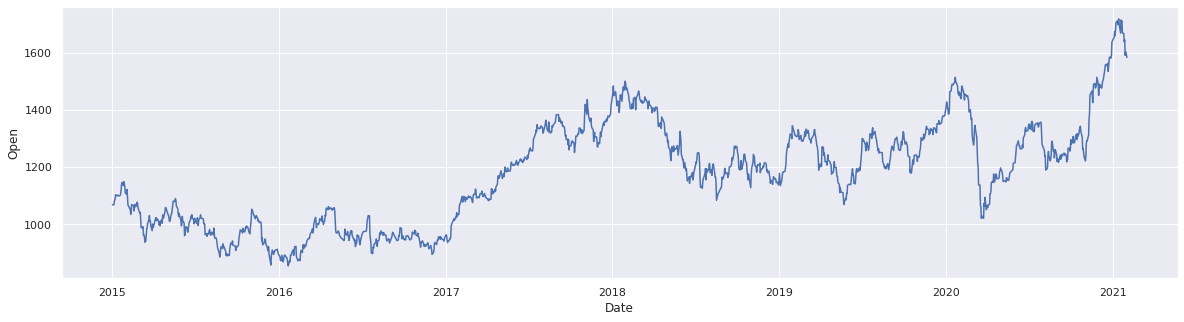

In [76]:
sns.set(rc={'figure.figsize':(20,5)})
sns.lineplot(data = bist_100.Open)

In [64]:
# This cell should be run only for BIST 30 since there is a problem in BIST 30 data.
#bist_100[bist_100.Open<800], bist_100[bist_100.Close<800] = bist_100[bist_100.Open<800]*10, bist_100[bist_100.Close<800]*10

## Aggregate GDELT data for required times

In [66]:
for i in bist_100.index[80:1519]:
  # O gün borsanın açılma saati:
  opens_at = i + dt.timedelta(hours = 6)
  # Borsanın son kapanışından bugün açılışa kadar olan tone scoreların df'ini bul:
  df_until_open = pca_result.loc[pca_result.index <= opens_at]
  #print(len(df_until_open))
  
  if len(df_until_open)==0:
    print(len(df_until_open))
    continue
    
  prev_last_open_day = df_until_open[df_until_open.is_open == 1].index[-2]
  df_until_open = df_until_open[df_until_open.index > prev_last_open_day]
  #print(len(df_until_open))
  #print(df_until_open[0].mean())

  #O günkü borsanın açık olduğu zamanların df'ini bul
  df_today_open = pca_result[pca_result.date == i]

  #Calculate required scores
  bist_100.loc[i,"mean_tone_score_from_prev_close_until_open"] = df_until_open[0].mean()
  bist_100.loc[i,"mean_tone_score_during_open"] = df_today_open[0].mean()

  bist_100.loc[i,"max_tone_score_from_prev_close_until_open"] = df_until_open[0].max()
  bist_100.loc[i,"max_tone_score_during_open"] = df_today_open[0].max()

  bist_100.loc[i,"min_tone_score_from_prev_close_until_open"] = df_until_open[0].min()
  bist_100.loc[i,"min_tone_score_during_open"] = df_today_open[0].min()

#bist_100 = bist_100.drop(["High", "Low", "Volume"], 1)
#bist_100 = bist_100.dropna()
bist_100["daily_return"] = (bist_100["Close"]  - bist_100["Open"]) / bist_100["Open"]
bist_100.describe()

,Open,High,Low,Close,Volume,mean_tone_score_from_prev_close_until_open,mean_tone_score_during_open,max_tone_score_from_prev_close_until_open,max_tone_score_during_open,min_tone_score_from_prev_close_until_open,min_tone_score_during_open,daily_return
count,1534.000000,1534.000000,1534.000000,1534.000000,1.534000e+03,85.000000,1439.000000,85.000000,1439.000000,85.000000,1439.000000,1534.000000
mean,1174.815743,1184.305280,1164.778911,1174.639733,1.204247e+06,-0.034524,-0.000183,1.549225,1.873469,-1.853093,-2.092508,-0.000069
std,179.603386,179.933021,179.858282,179.663701,8.135787e+05,0.629329,0.579906,0.783707,0.668667,1.052009,0.879409,0.013441
min,852.800000,861.500000,840.300000,849.500000,0.000000e+00,-1.912729,-1.486637,-0.371649,-0.296323,-4.128726,-4.956399,-0.062421
25%,1010.700000,1018.800000,1000.850000,1011.600000,3.291735e+05,-0.403739,-0.410087,1.084759,1.405277,-2.479337,-2.700083,-0.007545
50%,1187.625000,1198.750000,1175.750000,1188.225000,1.335565e+06,-0.108621,-0.052629,1.527934,1.850700,-1.842084,-2.155203,0.000000
75%,1307.187500,1317.500000,1297.000000,1307.500000,1.757110e+06,0.302245,0.337271,1.994888,2.275909,-1.023744,-1.509487,0.007650
max,1718.000000,1720.500000,1714.250000,1717.250000,4.672470e+06,1.562859,2.236795,3.332274,6.559779,1.056302,0.927790,0.056710


In [57]:
bist_100 = bist_100.dropna()

## Decide the tresholds

Text(0.5, 1.0, 'min_tone_score_from_prev_close_until_open')

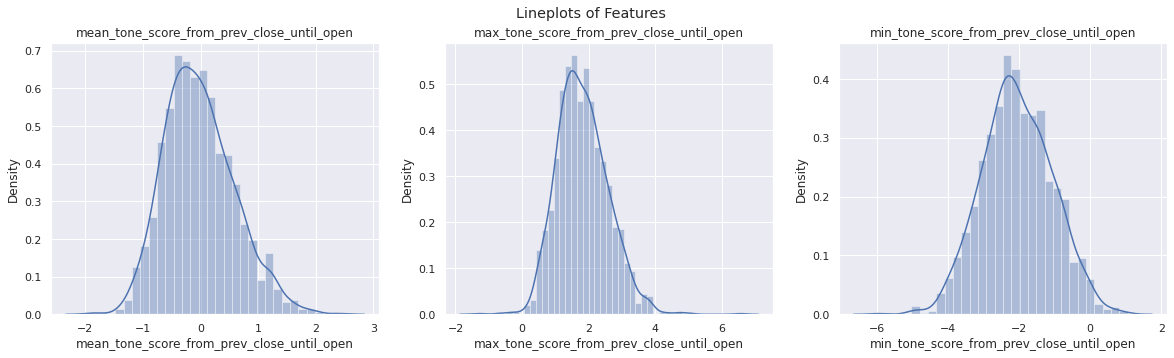

In [58]:
#Set the figure size: 
sns.set(rc={'figure.figsize':(20,5)})

#Divide the figure:
fig, axs = plt.subplots(1,3)
fig.suptitle('Lineplots of Features')

#Plot each variable with frgn_deposit_share
sns.distplot(bist_100.mean_tone_score_from_prev_close_until_open,  ax = axs[0]).set_title("mean_tone_score_from_prev_close_until_open")
sns.distplot(bist_100.max_tone_score_from_prev_close_until_open,  ax = axs[1]).set_title("max_tone_score_from_prev_close_until_open")
sns.distplot(bist_100.min_tone_score_from_prev_close_until_open,  ax = axs[2]).set_title("min_tone_score_from_prev_close_until_open")


In [59]:
returns = pd.DataFrame()
returns["base"] = ((bist_100.loc[:, "Close"] - bist_100.loc[:, "Open"])/bist_100.loc[:, "Open"]) + 1
returns = returns.fillna(1)

tresh_df = pd.DataFrame()
#Scenario: 
for i in list(range(100, 200, 1)):
  i = i/100
  bist_100["buy_at_open"] = 0
  bist_100["sell_at_close"] = 1

  bist_100.loc[bist_100.mean_tone_score_from_prev_close_until_open > i, "buy_at_open"] = 1
  returns["scenario_2"] = (( bist_100.loc[bist_100["buy_at_open"] == 1, "Close"] - bist_100.loc[bist_100["buy_at_open"] == 1, "Open"])/bist_100.loc[bist_100["buy_at_open"] == 1, "Open"] ) + 1
  tresh_df.loc[i,"alarm_count"] = returns.describe().loc["count", "scenario_2"]
  tresh_df.loc[i,"cumulative_return"] = np.prod(returns.scenario_2)
  tresh_df.loc[i,"mean_return"] = returns.describe().loc["mean", "scenario_2"]
tresh_df.sort_values("cumulative_return", ascending=False)

,alarm_count,cumulative_return,mean_return
1.29,34.0,1.132092,1.003750
1.38,25.0,1.123420,1.004781
1.39,25.0,1.123420,1.004781
1.37,26.0,1.122995,1.004583
1.30,32.0,1.119831,1.003642
...,...,...,...
1.11,72.0,0.987876,0.999910
1.16,64.0,0.981607,0.999791
1.02,87.0,0.932676,0.999301
1.01,88.0,0.929735,0.999273


## Analyze the days for best treshold

In [60]:
bist_100["buy_at_open"] = 0
bist_100["sell_at_close"] = 1

bist_100.loc[bist_100.mean_tone_score_from_prev_close_until_open > 1.29, "buy_at_open"] = 1
returns["scenario_1"] = (( bist_100.loc[bist_100["buy_at_open"] == 1, "Close"] - bist_100.loc[bist_100["buy_at_open"] == 1, "Open"])/bist_100.loc[bist_100["buy_at_open"] == 1, "Open"] ) + 1

In [51]:
bist_100[bist_100.buy_at_open==1]

,Open,High,Low,Close,Volume,mean_tone_score_from_prev_close_until_open,mean_tone_score_during_open,max_tone_score_from_prev_close_until_open,max_tone_score_during_open,min_tone_score_from_prev_close_until_open,min_tone_score_during_open,daily_return,buy_at_open,sell_at_close
Date,,,,,,,,,,,,,,
2015-09-03,748.01,751.48,740.75,747.62,604422016,1.373649,1.481302,2.519206,2.157791,-1.150582,-1.150582,-0.000521,1,1
2015-09-04,742.10,747.43,737.09,737.51,575984000,1.444704,1.377823,2.144415,2.093840,0.170416,0.140739,-0.006185,1,1
2015-09-08,731.85,734.52,724.62,728.92,472041984,1.307776,1.251729,2.130468,2.406807,0.071729,0.071729,-0.004004,1,1
2015-10-12,792.20,802.68,792.20,799.56,754008000,1.595437,1.304541,3.851054,2.723550,-0.676668,-0.047823,0.009291,1,1
2016-01-13,734.09,742.89,733.49,737.91,932810176,1.855127,1.618799,2.855061,3.374370,0.625969,0.319731,0.005204,1,1
2016-01-14,734.91,739.30,726.83,732.55,932953600,1.457044,1.798271,3.385147,3.505599,-0.309834,-0.481289,-0.003211,1,1
2016-02-18,739.28,746.51,735.76,746.51,901692352,1.602106,1.616290,3.172954,2.684082,-0.440748,-1.119979,0.009780,1,1
2016-03-15,811.08,811.08,798.52,800.80,942274112,1.604606,1.224912,3.056197,2.821078,-0.044502,-0.109621,-0.012674,1,1
2016-03-21,836.28,843.22,833.22,842.14,961611904,1.305062,0.542087,3.501257,1.880240,-1.569498,-0.887487,0.007007,1,1


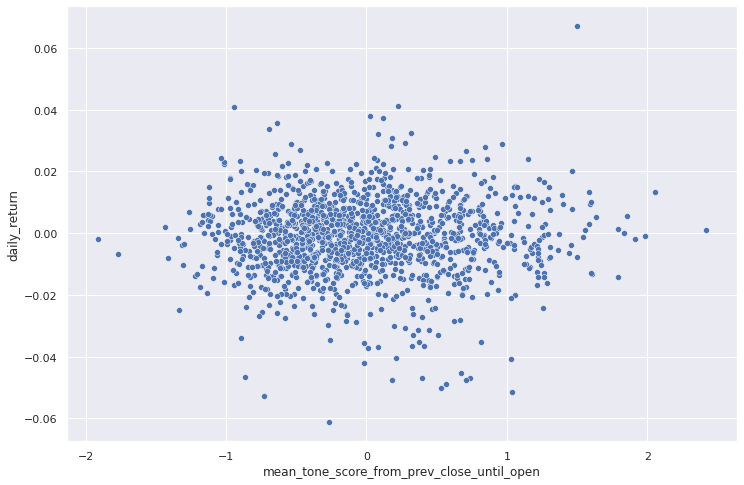

In [61]:
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(bist_100.mean_tone_score_from_prev_close_until_open, bist_100.daily_return)

## We have analyzed 3 different index in Turkey (BIST 30, BIST 100, BIST TUM) but didn't write seperated codes each of them. Instead, we just updated the BIST dataframe with new search quote. In below data frame, you can check and compare the performances of our model for each index.

In [75]:
performance_df = pd.DataFrame(columns = ["BIST 30", "BIST 100", "BIST TUM"])

performance_df["BIST 30"] = 1.29, 34, 3.03, 0.05
performance_df["BIST 100"] = 1.29,	34,	13.21	, 0.38
performance_df["BIST TUM"] =  1.29,	34,	14.82,	0.42
performance_df["Daily Interest"] = 1.29,	34,	1.13,	0.03

performance_df.index = ["best treshold", "total alarm count", "compound_return %", "mean_of_return %"]
performance_df

,BIST 30,BIST 100,BIST TUM,Daily Interest
best treshold,1.29,1.29,1.29,1.29
total alarm count,34.00,34.00,34.00,34.00
compound_return %,3.03,13.21,14.82,1.13
mean_of_return %,0.05,0.38,0.42,0.03
